In [18]:
import numpy as np
import pandas as pd
from numpy import unique,argmax
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout,MaxPool2D
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [5]:
x_train = x_train.reshape((x_train.shape[0],x_train.shape[1],x_train.shape[2],1))
x_test = x_test.reshape((x_test.shape[0],x_test.shape[1],x_test.shape[2],1))

In [7]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [8]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

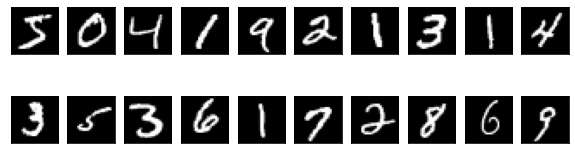

In [14]:
fig = plt.figure(figsize=(10,3))
for i in range(20):
    ax = fig.add_subplot(2,10,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]),cmap='gray')

In [40]:
shape = x_train.shape[1:]
shape

(28, 28, 1)

In [20]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape = shape))
model.add(MaxPool2D(2,2))
model.add(Conv2D(48,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 48)          0         
                                                                 
 flatten (Flatten)           (None, 1200)             

In [26]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
x = model.fit(x_train,y_train,epochs =5,batch_size=128,validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 25s 58ms/step - loss: 0.0750 - accuracy: 0.9759 - val_loss: 0.0422 - val_accuracy: 0.9872
Epoch 2/5
422/422 [==============================] - 28s 65ms/step - loss: 0.0556 - accuracy: 0.9823 - val_loss: 0.0321 - val_accuracy: 0.9898
Epoch 3/5
422/422 [==============================] - 25s 60ms/step - loss: 0.0442 - accuracy: 0.9857 - val_loss: 0.0287 - val_accuracy: 0.9920
Epoch 4/5
422/422 [==============================] - 24s 57ms/step - loss: 0.0384 - accuracy: 0.9873 - val_loss: 0.0312 - val_accuracy: 0.9897
Epoch 5/5
422/422 [==============================] - 23s 55ms/step - loss: 0.0337 - accuracy: 0.9887 - val_loss: 0.0332 - val_accuracy: 0.9900


In [27]:
loss,accuracy = model.evaluate(x_test,y_test)
print(f'Accuracy:{accuracy*100}')

313/313 [==============================] - 3s 8ms/step - loss: 0.0231 - accuracy: 0.9924
Accuracy:99.23999905586243


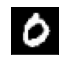

In [50]:
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(2,10,3,xticks=[],yticks=[])
ax.imshow(np.squeeze(x_test[3]),cmap='gray')

In [51]:
predictions = model.predict(x_test)

313/313 [==============================] - 2s 7ms/step


In [52]:
print(np.argmax(predictions[3]))

0
